# Preprocessing

## Importing Data:

In [10]:
# importing packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error as mape

In [11]:
# importing our data from the last phase
df = pd.read_csv('data_cleaned.csv')
df.head()

,Unnamed: 0,Demand Date,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,...,Total Fish Production,Total Meat Production,Total,Wind,Cloudiness,Precipitation,SUN,Air temperature,Is Holiday,Weekend
0,0,2013-10-04,0,0,0,0,1,0,0,0,...,24,149,173,1.916667,7.666667,0.1,150,15.858333,0,0
1,1,2013-10-05,0,0,0,0,0,1,0,0,...,21,147,168,2.738462,6.923077,10.7,0,13.192308,0,1
2,2,2013-10-06,0,0,0,0,0,0,1,0,...,22,69,91,1.364286,8.000000,0.4,0,10.571429,0,1
3,3,2013-10-07,1,0,0,0,0,0,0,0,...,10,91,101,2.316667,6.416667,0.0,176,13.333333,0,0
4,4,2013-10-08,0,1,0,0,0,0,0,0,...,20,98,118,1.658333,8.000000,0.0,0,13.541667,0,0


In [12]:
df.drop(columns=df.columns[0], axis=1,  inplace=True)

In [13]:
df.drop(columns=['2013', '2014', '2015', 'Calamari', 'Fish', 'Shrimp',
       'Chicken', 'Koefte', 'Lamb', 'Steak','Total'], axis=1,inplace=True)

In [15]:
df.head()

,Demand Date,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,...,December,Total Fish Production,Total Meat Production,Wind,Cloudiness,Precipitation,SUN,Air temperature,Is Holiday,Weekend
0,2013-10-04,0,0,0,0,1,0,0,0,0,...,0,24,149,1.916667,7.666667,0.1,150,15.858333,0,0
1,2013-10-05,0,0,0,0,0,1,0,0,0,...,0,21,147,2.738462,6.923077,10.7,0,13.192308,0,1
2,2013-10-06,0,0,0,0,0,0,1,0,0,...,0,22,69,1.364286,8.000000,0.4,0,10.571429,0,1
3,2013-10-07,1,0,0,0,0,0,0,0,0,...,0,10,91,2.316667,6.416667,0.0,176,13.333333,0,0
4,2013-10-08,0,1,0,0,0,0,0,0,0,...,0,20,98,1.658333,8.000000,0.0,0,13.541667,0,0


In [16]:
df.columns

Index(['Demand Date', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'Total Fish Production', 'Total Meat Production', 'Wind',
       'Cloudiness', 'Precipitation', 'SUN', 'Air temperature', 'Is Holiday',
       'Weekend'],
      dtype='object')

In [17]:
df.rename(columns={'Demand Date':'Date','SUN':'Sun', 'Air temperature':'Air Temperature'}, inplace=True)

In [18]:
df.set_index('Date', inplace=True)

In [19]:
df.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,...,December,Total Fish Production,Total Meat Production,Wind,Cloudiness,Precipitation,Sun,Air Temperature,Is Holiday,Weekend
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-04,0,0,0,0,1,0,0,0,0,0,...,0,24,149,1.916667,7.666667,0.1,150,15.858333,0,0
2013-10-05,0,0,0,0,0,1,0,0,0,0,...,0,21,147,2.738462,6.923077,10.7,0,13.192308,0,1
2013-10-06,0,0,0,0,0,0,1,0,0,0,...,0,22,69,1.364286,8.000000,0.4,0,10.571429,0,1
2013-10-07,1,0,0,0,0,0,0,0,0,0,...,0,10,91,2.316667,6.416667,0.0,176,13.333333,0,0
2013-10-08,0,1,0,0,0,0,0,0,0,0,...,0,20,98,1.658333,8.000000,0.0,0,13.541667,0,0


In [20]:
df.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,...,December,Total Fish Production,Total Meat Production,Wind,Cloudiness,Precipitation,Sun,Air Temperature,Is Holiday,Weekend
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.143421,0.143421,0.139474,0.142105,0.143421,0.144737,0.143421,0.081579,0.073684,0.081579,...,0.075000,18.959211,106.605263,3.059081,5.073017,0.814474,236.393421,13.350236,0.028947,0.288158
std,0.350733,0.350733,0.346668,0.349388,0.350733,0.352067,0.350733,0.273902,0.261428,0.273902,...,0.263565,7.619555,36.962460,1.238119,2.364592,2.700388,207.381674,7.644363,0.167769,0.453203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,7.000000,1.058333,0.000000,0.000000,0.000000,-5.942857,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,14.000000,83.000000,2.162798,3.083333,0.000000,33.500000,7.055288,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.000000,100.000000,2.856090,5.583333,0.000000,206.500000,13.733333,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,23.000000,123.000000,3.626442,7.166667,0.200000,406.250000,18.335417,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,62.000000,285.000000,11.391667,8.000000,37.400000,782.000000,34.891667,1.000000,1.000000


## Splitting Data into Test and Train Sets

Before we move onto any of our standardization steps we should split the data into test and train sets so that we can treat them as individual datasets.

In [21]:
df.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Total Fish Production', 'Total Meat Production', 'Wind', 'Cloudiness',
       'Precipitation', 'Sun', 'Air Temperature', 'Is Holiday', 'Weekend'],
      dtype='object')

Since we are working to predict not only overall demand but individual demands of various products, our responding variable will be multidimensional and contain several columns.

In [22]:
X = df.drop(columns=['Total Fish Production', 'Total Meat Production'], axis=1)
y = df.loc[:,'Total Fish Production':'Total Meat Production']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# set aside a copy of the original state of X_train for selective training down the line
X_train_orig = X_train.copy()

In [25]:
X_train.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,...,October,November,December,Wind,Cloudiness,Precipitation,Sun,Air Temperature,Is Holiday,Weekend
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.150376,0.131579,0.142857,0.146617,0.125940,0.157895,0.144737,0.086466,0.075188,0.090226,...,0.127820,0.082707,0.060150,3.046774,4.978743,0.732331,246.236842,13.477226,0.022556,0.302632
std,0.357776,0.338351,0.350256,0.354056,0.332094,0.364985,0.352166,0.281316,0.263943,0.286774,...,0.334203,0.275698,0.237989,1.190236,2.394437,2.807370,211.181289,7.670927,0.148624,0.459829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.116667,0.000000,0.000000,0.000000,-5.942857,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.166071,3.080357,0.000000,41.500000,7.097917,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.851923,5.439103,0.000000,216.500000,13.820833,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.667857,7.098214,0.100000,427.250000,18.350000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,8.138462,8.000000,37.400000,782.000000,34.891667,1.000000,1.000000


Now from what we can see, this data set already came with the days of the week,months, and year turned into dummy variables. So we can exclude these from any preprocessing steps for now and then join them back into our dataset before we move onto modelling.

Additionally, you can see above because there are vastly different kinds of units being measured across the various columns it is a good idea for us to standardize them such that no one variable dominates the analysis being done due to the scale of its measurements. For example, we can see above that wind is measured in vastly different units than Sun - with a range of 10 units whereas Sun has a range of 782. 

## Standardizing Train and Test Sets

In [26]:
X_train.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Wind', 'Cloudiness', 'Precipitation', 'Sun', 'Air Temperature',
       'Is Holiday', 'Weekend'],
      dtype='object')

In [27]:
X_std_columns = ['Wind', 'Cloudiness', 'Precipitation', 'Sun', 'Air Temperature']

In [28]:
# initiate standard scaler
ss = StandardScaler()

In [29]:
# standardize those columns
ss.fit(X_train[X_std_columns])
X_scaled = ss.transform(X_train[X_std_columns])

In [30]:
X_train[X_std_columns] = X_scaled

In [31]:
X_train_orig.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,...,October,November,December,Wind,Cloudiness,Precipitation,Sun,Air Temperature,Is Holiday,Weekend
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-22,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1.764286,5.928571,1.0,218,3.885714,0,1
2015-03-11,0,0,1,0,0,0,0,0,0,1,...,0,0,0,2.783333,0.583333,0.0,483,7.016667,0,0
2013-12-27,0,0,0,0,1,0,0,0,0,0,...,0,0,1,4.350000,2.083333,0.0,348,6.066667,0,0
2013-12-04,0,0,1,0,0,0,0,0,0,0,...,0,0,1,3.291667,7.916667,0.0,20,2.600000,0,0
2015-03-16,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1.925000,2.333333,0.0,470,12.925000,0,0


In [32]:
X_train.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,...,October,November,December,Wind,Cloudiness,Precipitation,Sun,Air Temperature,Is Holiday,Weekend
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-22,0,0,0,0,0,0,1,0,1,0,...,0,0,0,-1.078521,0.397055,0.095435,-0.133835,-1.251549,0,1
2015-03-11,0,0,1,0,0,0,0,0,0,1,...,0,0,0,-0.221543,-1.837403,-0.261106,1.122192,-0.843006,0,0
2013-12-27,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1.095961,-1.210362,-0.261106,0.482329,-0.966967,0,0
2013-12-04,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.205945,1.228134,-0.261106,-1.072300,-1.419315,0,0
2015-03-16,1,0,0,0,0,0,0,0,0,1,...,0,0,0,-0.943367,-1.105855,-0.261106,1.060576,-0.072057,0,0


In [33]:
# lets repeat the above steps for the X_test set
X_test.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Wind', 'Cloudiness', 'Precipitation', 'Sun', 'Air Temperature',
       'Is Holiday', 'Weekend'],
      dtype='object')

In [34]:
# convert the X_train and X_test sets from dataframes into arrays for use in modelling
X_train = X_train.values
X_test = X_test.values

In [35]:
print(X_train.shape)
print(X_test.shape)

(532, 26)
(228, 26)


In [36]:
print(y_train.shape)
print(y_test.shape)

(532, 2)
(228, 2)


In [37]:
# lets standardize the y_train and y_test sets as well
y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)

In [38]:
print(y_train.shape)
print(y_test.shape)

(532, 2)
(228, 2)


# Modelling

## Our 3 Models:

As we are dealing with a regression type prediction problem, we will be working with following models:
- Linear Regression
- Partial Least Squares Regression
- K Nearest Neighbors
- Random Forest

In [39]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Linear Regression:

In [40]:
# import the model
from sklearn.linear_model import LinearRegression

# instantiate the model
linreg = LinearRegression()

# fit the model to the training data
linreg.fit(X_train, y_train)

# use the model to predict results based on the test set
y_pred_linreg = linreg.predict(X_test)

In [41]:
y_pred_linreg.shape

(228, 2)

In [42]:
y_test.shape

(228, 2)

### Linear Regression Model Evaluation:

In [43]:
# import the necessary metrics to evaluate the model
from sklearn.metrics import mean_squared_error

mse_linreg = mean_squared_error(y_test, y_pred_linreg)
print("The linear regression mean squared error: " + str(mse_linreg))

linreg_mape = mape(y_test,y_pred_linreg)
print("The linear regression model mean absolute percentage error: " + str(linreg_mape))

linreg_cv = cross_val_score(linreg, X, y, cv=5)
print("%0.2f percent accuracy with a standard deviation of %0.2f" % (linreg_cv.mean()*100, linreg_cv.std()*100))

The linear regression mean squared error: 1130.1110929801362
The linear regression model mean absolute percentage error: 325.9499954553569
34.06 percent accuracy with a standard deviation of 10.39


## Partial Least Squares Regression (PLS):

In [44]:
# import the model
from sklearn.cross_decomposition import PLSRegression

In [117]:
# PLS Regression features an n-component parameter.
# we will loop through various components until we identify the best performing parameter

mse = []
components = []
mean_cv = []

for i in range(2,10):
    pls = PLSRegression(n_components = i)
    
    pls.fit(X_train,y_train)
    y_pred = pls.predict(X_test)
    components.append(i)
    mse.append(mean_squared_error(y_test,y_pred))
    cv_scores = cross_val_score(pls, X, y, cv=5)
    mean_cv.append(cv_scores.mean())
    

Text(0.5, 1.0, 'PLS Mean Squared Error vs. Number of Components')

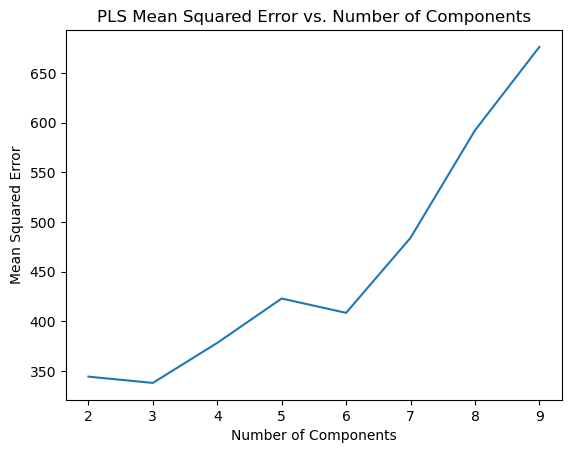

In [118]:
plt.plot(components, mse)
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')
plt.title('PLS Mean Squared Error vs. Number of Components')

Text(0.5, 1.0, 'Mean CV Score vs. Number of Components')

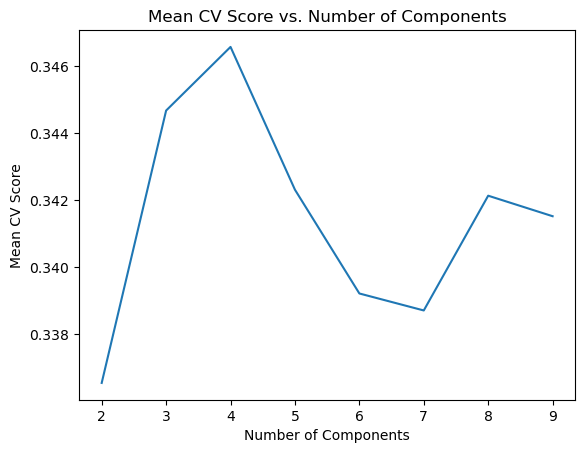

In [119]:
plt.plot(components,mean_cv)
plt.xlabel('Number of Components')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs. Number of Components')

In [128]:
# the lowest mean squared error is a result of using 4 components 
pls = PLSRegression(n_components = 4)

pls.fit(X_train,y_train)
y_pls_pred = pls.predict(X_test)

### PLS Regression Model Evaluation:

In [129]:
mse_pls = mean_squared_error(y_test, y_pls_pred)
print("The linear regression mean squared error: " + str(mse_pls))

pls_mape = mape(y_test, y_pls_pred)
print("The linear regression model mean absolute percentage error: " + str(pls_mape))

pls_cv = cross_val_score(pls, X, y, cv=5)
print("%0.2f percent accuracy with a standard deviation of %0.2f" % (pls_cv.mean()*100, pls_cv.std()*100))

The linear regression mean squared error: 378.3965955342321
The linear regression model mean absolute percentage error: 293.09247169633494
34.66 percent accuracy with a standard deviation of 10.62


## K Nearest Neighbors (KNN):

In [130]:
# import the model
from sklearn.neighbors import KNeighborsRegressor

# loop through a range of K neighbors to identify the best performing parameter

neighbors = range(2, 25, 1)
mse = []
mean_cv = []

for i in neighbors:
    
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', algorithm='kd_tree', p=1)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    cv_scores = cross_val_score(knn, X, y, cv=5)
    mean_cv.append(cv_scores.mean())


Text(0.5, 1.0, 'Mean Squared Error vs. Number of Neighbors')

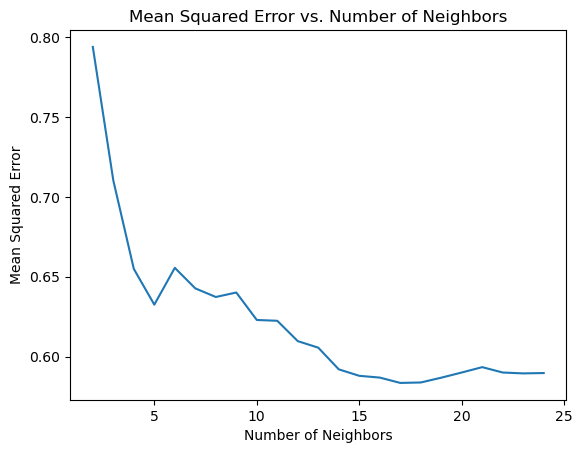

In [131]:
plt.plot(list(neighbors),mse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Neighbors')

Text(0.5, 1.0, 'Mean CV Score vs. Number of Neighbors')

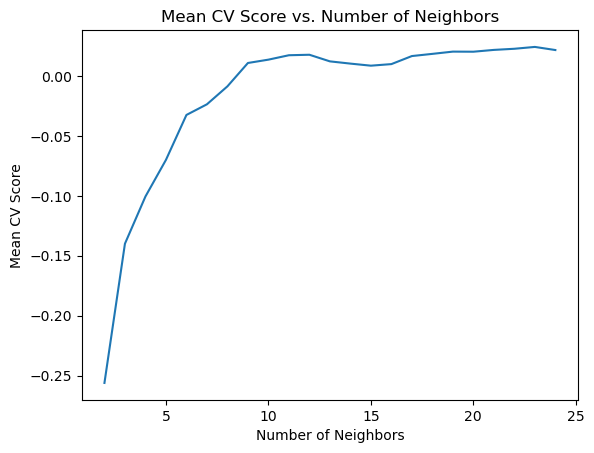

In [132]:
plt.plot(list(neighbors),mean_cv)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs. Number of Neighbors')

In [143]:
# instantiate the KNN model with the optimal number of neighbors
knn = KNeighborsRegressor(n_neighbors=23, weights='distance', algorithm='kd_tree', p=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [144]:
knn_mse = mean_squared_error(y_test, y_pred)
print("The KNN mean squared error: " + str(mse_pls))

knn_mape = mape(y_test, y_pred)
print("The KNN model mean absolute percentage error: " + str(knn_mape))

knn_cv = cross_val_score(knn, X, y, cv=5)
print("%0.2f percent accuracy with a standard deviation of %0.2f" % (knn_cv.mean()*100, knn_cv.std()*100))

The KNN mean squared error: 378.3965955342321
The KNN model mean absolute percentage error: 1.8644701453911603
2.43 percent accuracy with a standard deviation of 1.44


## Random Forest Regressor:

### Randomized Hyperparameter Tuning:

In [86]:
# import the necessary package
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
params = {
    'bootstrap': [True, False],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'max_depth': [5,6,7,8,9,10],
    'min_samples_split': [2, 4, 6, 8, 10, 20, 40, 80],
    'max_features': [0.3,0.4,0.5],
    'n_estimators': [20, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

# Create a based model
rand_for = RandomForestRegressor()

# Instantiate the grid search model
random_gridsearch = RandomizedSearchCV(estimator = rand_for, param_distributions = params, 
                          n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [87]:
# Fit the grid search to the data
random_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': [0.3, 0.4, 0.5],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              20, 40, 80],
                                        'n_estimators': [20, 50, 100, 200, 400,
                                                         600, 800, 1000, 1200,
                                                         1400, 1600, 1800,
                                                         2000]},
                   random_state=42, verbose=2)

In [88]:
# Look at what parameters create the best performance
print(random_gridsearch.best_estimator_)

# Look at the score of the best parameters
print(random_gridsearch.best_score_)

# Instantiate the model with it's best parameters
rand_rf = random_gridsearch.best_estimator_

print(rand_rf.get_params())

RandomForestRegressor(max_depth=7, max_features=0.3, min_samples_leaf=2,
                      min_samples_split=6, n_estimators=800)
0.5104893703912107
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 7, 'max_features': 0.3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [89]:
# use the model to predict new values
rand_rf_ypred = rand_rf.predict(X_test)

In [90]:
#Evaluate the Randomized Grid Search model performance
rand_rf_mse = mean_squared_error(y_test, rand_rf_ypred)
print("The randomized search random forest regression mean squared error: " + str(rand_rf_mse))

rand_rf_mape = mape(y_test, rand_rf_ypred)
print("The randomized search random forest regression regression model mean absolute percentage error: " + str(rand_rf_mape))

# use cross validation to check model performance
rand_rf_cv = cross_val_score(rand_rf, X, y, cv=5)
print("%0.2f percent accuracy with a standard deviation of %0.2f" % (rand_rf_cv.mean()*100, rand_rf_cv.std()*100))

The randomized search random forest regression mean squared error: 0.5869182838782214
The randomized search random forest regression regression model mean absolute percentage error: 3.041444018137229
42.41 percent accuracy with a standard deviation of 9.43


## Check Model for Overfitting:

In [91]:
# use the model defined above to predict new values for the train set to compare performance
rand_rf_ypred_train = rand_rf.predict(X_train)

#Evaluate the Randomized Grid Search model performance on the train set
rand_rf_mse_train = mean_squared_error(y_train, rand_rf_ypred_train)
print("The base random forest regression mean squared error: " + str(rand_rf_mse_train))

rand_rf_mape_train = mape(y_train, rand_rf_ypred_train)
print("The base random forest regression regression model mean absolute percentage error: " + str(rand_rf_mape_train))

The base random forest regression mean squared error: 0.3329720505148284
The base random forest regression regression model mean absolute percentage error: 2.5583306657989153


In [92]:
percent_improvement_mse = abs((rand_rf_mse_train - rand_rf_mse) / rand_rf_mse)*100
percent_improvement_mape = abs((rand_rf_mape_train - rand_rf_mape) / rand_rf_mape)*100 

print("The model showed a " + str(percent_improvement_mse) + "% improvement in mean squared error.")
print("The model showed a " + str(percent_improvement_mape) + "% improvement in mean absolute percentage error.")

The model showed a 43.267732551348466% improvement in mean squared error.
The model showed a 15.88434143312631% improvement in mean absolute percentage error.


The above results show that there is a significant improvement in model performance when it predicted new values based on the training data set. This improvement in performance indicates overfitting and that we need to reevaluate our model parameters.

## Redefine Model Parameters and Rerun Random Search:

In [93]:
# Create the parameter grid based on the results of random search 
params = {
    'bootstrap': [True],
    'min_samples_leaf': [2, 3, 4, 5],
    'max_depth': list(np.arange(5, 9, 1)),
    'min_samples_split': [6, 8, 10, 12, 14],
    'max_features': list(np.arange(0.3, 0.7, 0.1)),
    'n_estimators': list(np.arange(500, 2000, 100)),
    'criterion': ['squared_error']
}

# Create a based model
rand_for = RandomForestRegressor()

# Instantiate the grid search model
random_gridsearch = RandomizedSearchCV(estimator = rand_for, param_distributions = params, 
                          n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [94]:
# Fit the grid search to the data
random_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['squared_error'],
                                        'max_depth': [5, 6, 7, 8],
                                        'max_features': [0.3, 0.4, 0.5,
                                                         0.6000000000000001],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [6, 8, 10, 12, 14],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900]},
                   random_state=42, verbose=2)

In [95]:
# Look at what parameters create the best performance
print(random_gridsearch.best_estimator_)

# Look at the score of the best parameters
print(random_gridsearch.best_score_)

# Instantiate the model with it's best parameters
rand_rf = random_gridsearch.best_estimator_

print(rand_rf.get_params())

RandomForestRegressor(max_depth=6, max_features=0.5, min_samples_leaf=2,
                      min_samples_split=12, n_estimators=900)
0.5116144632920997
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 900, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [96]:
# use the model to predict new values
rand_rf_ypred = rand_rf.predict(X_test)

In [97]:
#Evaluate the Randomized Grid Search model performance
rand_rf_mse = mean_squared_error(y_test, rand_rf_ypred)
print("The randomized search random forest regression mean squared error: " + str(rand_rf_mse))

rand_rf_mape = mape(y_test, rand_rf_ypred)
print("The randomized search random forest regression regression model mean absolute percentage error: " + str(rand_rf_mape))

# use cross validation to check model performance
rand_rf_cv = cross_val_score(rand_rf, X, y, cv=5)
print("%0.2f percent accuracy with a standard deviation of %0.2f" % (rand_rf_cv.mean()*100, rand_rf_cv.std()*100))

The randomized search random forest regression mean squared error: 0.6041993547375255
The randomized search random forest regression regression model mean absolute percentage error: 3.1700858599681427
42.39 percent accuracy with a standard deviation of 10.70


### Bayesian Optimization for Hyperparameter Tuning:

In [98]:
# using the results from our Randomized Grid Search, we will construct a new parameter grid for BayesSearchCV
from skopt import BayesSearchCV

params_new = {
    'bootstrap': [True],
    'criterion':['squared_error'],
    'min_samples_leaf': [2,3,4,5],
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [5,6,7,8,9],
    'max_features': [0.2,0.25,0.3,0.35,0.4],
    'n_estimators': [1000,1100,1200,1300,1400,1500, 1600,1700,1800,1900,2000]
}

bscv = BayesSearchCV(RandomForestRegressor(),params_new,n_iter=30,random_state=42)

bscv.fit(X_train,y_train)

BayesSearchCV(estimator=RandomForestRegressor(), n_iter=30, random_state=42,
              search_spaces={'bootstrap': [True],
                             'criterion': ['squared_error'],
                             'max_depth': [3, 4, 5, 6, 7, 8],
                             'max_features': [0.2, 0.25, 0.3, 0.35, 0.4],
                             'min_samples_leaf': [2, 3, 4, 5],
                             'min_samples_split': [5, 6, 7, 8, 9],
                             'n_estimators': [1000, 1100, 1200, 1300, 1400,
                                              1500, 1600, 1700, 1800, 1900,
                                              2000]})

In [99]:
# Look at what parameters create the best performance
print(bscv.best_params_)

# define the new set of parameters based on Bayesian Optimization
bayes_params = bscv.best_params_

# Instantiate the model with it's best parameters
bayes_rf = RandomForestRegressor(**bayes_params)

OrderedDict([('bootstrap', True), ('criterion', 'squared_error'), ('max_depth', 8), ('max_features', 0.3), ('min_samples_leaf', 3), ('min_samples_split', 8), ('n_estimators', 1400)])


In [100]:
# fit the estimator to the train set
bayes_rf.fit(X_train, y_train)

# Evaluate the GridSearchCV model performance
bayes_rf_ypred = bayes_rf.predict(X_test)

bayes_rf_mse = mean_squared_error(y_test, bayes_rf_ypred)
print("The bayesian optimization random forest regression mean squared error: " + str(bayes_rf_mse))

bayes_rf_mape = mape(y_test, bayes_rf_ypred)
print("The bayesian optimizationrandom forest regression regression model mean absolute percentage error: " + str(bayes_rf_mape))

bayes_rf_cv = cross_val_score(bayes_rf, X, y, cv=5)
print("%0.2f percent accuracy with a standard deviation of %0.2f" % (bayes_rf_cv.mean()*100, bayes_rf_cv.std()*100))

The bayesian optimization random forest regression mean squared error: 0.5886198228920206
The bayesian optimizationrandom forest regression regression model mean absolute percentage error: 3.0606415017178636
42.32 percent accuracy with a standard deviation of 9.25


### Base Random Forest Regressor Model Performance:

In [101]:
# compare it to the base random forest model
base_rf = RandomForestRegressor(n_estimators = 100, random_state=42)

# fit the model to the data
base_rf.fit(X_train,y_train)

# evaluate the model's performance
base_ypred = base_rf.predict(X_test)

base_rf_mse = mean_squared_error(y_test, base_ypred)
print("The base random forest regression mean squared error: " + str(base_rf_mse))

base_rf_mape = mape(y_test, base_ypred)
print("The base random forest regression regression model mean absolute percentage error: " + str(base_rf_mape))

base_rf_cv = cross_val_score(base_rf, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (base_rf_cv.mean(), base_rf_cv.std()))

The base random forest regression mean squared error: 0.724964088386755
The base random forest regression regression model mean absolute percentage error: 2.7357551688193027
0.34 accuracy with a standard deviation of 0.13


### Random Forest Model Comparison:

In [102]:
rand_score = rand_rf_cv.mean()
bayes_score = bayes_rf_cv.mean()
base_score = base_rf_cv.mean()

print("The random search model showed a %0.2f percent improvement from the base model performance" % (((rand_score-base_score)/base_score)*100))
print("The bayesian optimization model showed a %0.2f percent improvement from the base model performance" % (((bayes_score-base_score)/base_score)*100))
print("The bayesian optimization showed a %0.2f percent improvement from the random search model performance" % (((bayes_score-rand_score)/rand_score)*100))

The random search model showed a 24.42 percent improvement from the base model performance
The bayesian optimization model showed a 24.23 percent improvement from the base model performance
The bayesian optimization showed a -0.15 percent improvement from the random search model performance


## Support Vector Regression (SVR) Model:

In [103]:
# import the necessary package
# The SVR model does not work natively with multivariate regression 
# We need to wrap it in a function that will allow it to do so
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# instantiate the model with the gaussian kernel
svr = SVR(kernel='rbf', epsilon=0.2)

# Instantiate the Multioutput Regressor to wrap our SVR model in
mor = MultiOutputRegressor(svr)

# fit the model on the train sets
mor.fit(X_train,y_train)

# use the model to predict based on the x_test set
svr_multi_ypred = mor.predict(X_test)

### Iterate through the Responding Variables to Examine Model Performance:

In [104]:
y_test.shape

(228, 2)

In [107]:
svr_mse = []
svr_mape = []

for i in range(2):
    svr_mse.append(mean_squared_error(y_test[:,i],svr_multi_ypred[:,i]))
    svr_mape.append(mape(y_test[:,i],svr_multi_ypred[:,i]))

In [108]:
print(min(svr_mse))
print(min(svr_mape))

0.8235020504600025
1.4901547903938606


In [109]:
def avg_list(lst):
    return (sum(lst)/len(lst))

In [110]:
print('The SVR model mean squared error is: ' + str(avg_list(svr_mse)))
print('The SVR Model mean absolute percentage error is: ' + str(avg_list(svr_mape)))
svr_cv = cross_val_score(mor, X, y, cv =5)
print("%0.2f percent accuracy with a standard deviation of %0.2f" % (svr_cv.mean()*100, svr_cv.std()*100))

The SVR model mean squared error is: 0.8531301195919251
The SVR Model mean absolute percentage error is: 3.299470230116503
-4.66 percent accuracy with a standard deviation of 4.21


# Model Performance Ranking:

In [111]:
model_cv_scores = [(linreg_cv.mean(),'Linear Regression Model'),(pls_cv.mean(), 'Partial Least Squares Model'),
                   (knn_cv.mean(), 'K Nearest Neighbors Model'),(rand_rf_cv.mean(),'Random Forest Regression Model'),
                  (svr_cv.mean(),'Support Vector Regression Model')]
models_sorted = sorted(model_cv_scores, key=lambda tup: tup[0], reverse=True)

In [116]:
for i in range(len(models_sorted)):
    print("#"+str(i+1)+". "+str(models_sorted[i][1])+' with an accuracy of '+str((models_sorted[i][0])*100)+"%")

#1. Random Forest Regression Model with an accuracy of 42.3862116262672%
#2. Partial Least Squares Model with an accuracy of 34.6582872127684%
#3. Linear Regression Model with an accuracy of 34.060278816624624%
#4. K Nearest Neighbors Model with an accuracy of 2.4250683612107027%
#5. Support Vector Regression Model with an accuracy of -4.664815736550158%
